<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 03.04.2021
</pre>

Link to dataset: https://www.kaggle.com/itsmesunil/bank-loan-modelling

<h2>KNN Classification</h2>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", engine="openpyxl", sheet_name="Data") 

In [ ]:
# dataset used in Single Layer Perceptron and Naive Bayes implementation before

In [24]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Target column: Personal Loan

In [25]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [44]:
data.isnull().sum() #checking missing values

Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Checking correlation

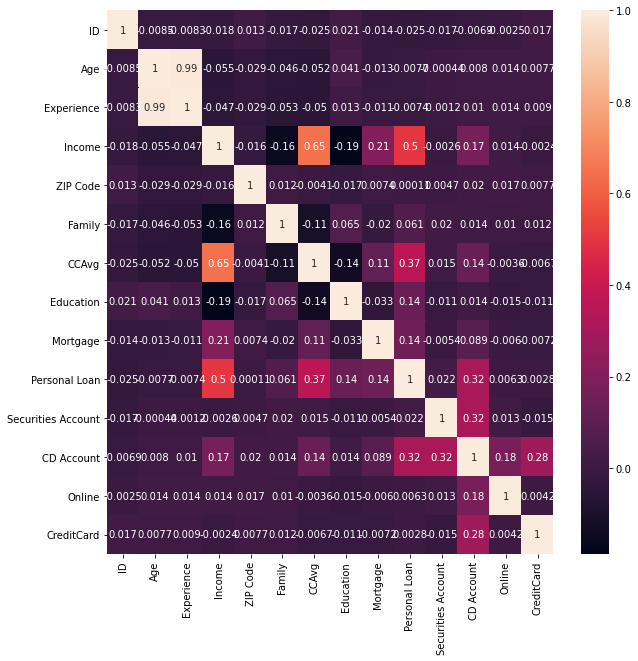

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

Dropping Age because of its high correlation with Experience to avoid collinearity.

In [27]:
data.drop(['ID','ZIP Code','Age'],axis=1, inplace=True)

Splitting dataset

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Personal Loan'],axis=1), data['Personal Loan'], test_size = 0.3)

Model training

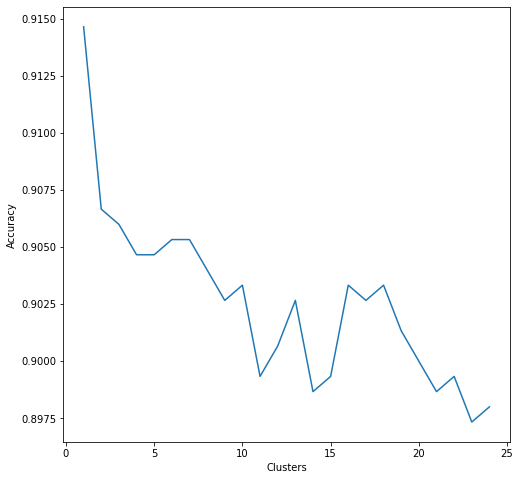

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clusters = [] #value of k
accuracy = []
cr = []
cf = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    clusters.append(i)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    cr.append(classification_report(y_test, y_pred))
    cf.append(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(8,8))
plt.plot(clusters, accuracy)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.show()

###How to identify the global optimum
- the value of k giving the maximum accuracy can be considered.
- here highest accuracy = 0.9053, for k = 6,7. 
-- So the accuracy is 0.9053, and we chose k=6

Evaluation metrics

In [33]:
print("Confusion matrix")
print(cf[6])

Confusion matrix
[[1311   39]
 [ 103   47]]


In [40]:
print("Classification Report")
print(cr[6])

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1350
           1       0.55      0.31      0.40       150

    accuracy                           0.91      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [41]:
print("Accuracy")
print(accuracy[6])

Accuracy
0.9053333333333333


### The accuracy is better than Single Layer perceptron = 87.5%, but lesser than Naive Baiyes = 94%